In [0]:
def timediff(t1,t2):
    t1=(t1 + '000')
    t2=(t2 + '000')
#     day1=datetime.strptime(t1, "%H:%M:%S.%f")
#     day2=datetime.strptime(t2, "%H:%M:%S.%f")


    day1=float(t1[6:])
    day2=float(t2[6:])
    t=round(day2-day1,3)
    return (t)
    #sec = (day2-day1).total_seconds()




In [0]:
!pip install minisom

In [0]:
trainf=[1,2,3,4,5,6,7,8]
testf=[9,10]

In [0]:
features=[]
y=[]

In [251]:
import os
import string
from datetime import datetime
import numpy as np
import itertools


for k in trainf:
 
  print (k)
  file_name='new_date'+str(k)+'.txt'
  lines = [line.rstrip('\t\n') for line in open(file_name)]
  f_list = [event.split('\t') for event in lines]



  alp = list(string.ascii_lowercase)
  alp2 = list(map(''.join,itertools.combinations(string.ascii_lowercase,2)))

  #print (alp)
  #print (alp2)




  # ##########################################################

  KeyUps = [x for x in f_list if 'KeyUp' in x]
  KeyDowns = [x for x in f_list if 'KeyDown' in x]

  # ###########################################################

  tups =  [item[-1].split(' ')[-1].split(":",1)[1] for item in KeyUps]# if item[1] in alp]
  tdowns =  [item1[-1].split(' ')[-1].split(":",1)[1] for item1 in KeyDowns]

  #print (tups)
  # if item1[1] in alp]
  try:
      letterup =  [item[1].upper() for item in KeyUps]# if item[1] in alp]
  except: 
      pass

  try:
      letterdown = [item1[1].upper() for item1 in KeyDowns]# if item1[1] in alp]
  except:
      pass

  #print (letterup)

  # #############################################################


  for i in range(0,len(tups)-1):
      t = i

      t1 = tdowns[i]

      if letterup[t] != letterdown[i]:
          j = i

          if i == len(tups)-1:
              j = 0
          while j<len(tups)-1 and letterdown[i]!= letterup[j] and i!=len(tups)-1:
              j = j+1

          tj = tups[j]
          k = i

          if i == 0:
              k = len(tups)-1
          while k>=1 and letterdown[i]!= letterup[k] and i!=0:
              k = k-1

          tk = tups[k]


          if timediff(t1,tk)>0 and timediff(t1,tj)>0 :
              if abs(j-i)<abs(i-k):
                  t = j
              else:
                  t = k

          elif timediff(t1,tk)<0 :
              t = j
          else:
              t = k

      t2 = tups[t]



      if i!=len(tups)-1:

          t3 = tdowns[i+1]
          latency = timediff(t1,t3)

          lat = [int(letterdown[i]+letterdown[i+1]),latency]
          features.append(lat)
          y.append(k-1)

      hold_time = timediff(t1,t2)
      hold = [int(letterdown[i]),hold_time]
      features.append(hold)
      y.append(k-1)

  #print (features)

###################################################################

1
2
3
4
5
6
7
8


In [0]:
features1=[]
y1=[]

In [253]:
for k in testf:
 
  print (k)
  file_name='new_date'+str(k)+'.txt'
  lines = [line.rstrip('\t\n') for line in open(file_name)]
  f_list = [event.split('\t') for event in lines]



  alp = list(string.ascii_lowercase)
  alp2 = list(map(''.join,itertools.combinations(string.ascii_lowercase,2)))

  #print (alp)
  #print (alp2)




  # ##########################################################

  KeyUps = [x for x in f_list if 'KeyUp' in x]
  KeyDowns = [x for x in f_list if 'KeyDown' in x]

  # ###########################################################

  tups =  [item[-1].split(' ')[-1].split(":",1)[1] for item in KeyUps]# if item[1] in alp]
  tdowns =  [item1[-1].split(' ')[-1].split(":",1)[1] for item1 in KeyDowns]

  #print (tups)
  # if item1[1] in alp]
  try:
      letterup =  [item[1].upper() for item in KeyUps]# if item[1] in alp]
  except: 
      pass

  try:
      letterdown = [item1[1].upper() for item1 in KeyDowns]# if item1[1] in alp]
  except:
      pass

  #print (letterup)

  # #############################################################


  for i in range(0,len(tups)-1):
      t = i

      t1 = tdowns[i]

      if letterup[t] != letterdown[i]:
          j = i

          if i == len(tups)-1:
              j = 0
          while j<len(tups)-1 and letterdown[i]!= letterup[j] and i!=len(tups)-1:
              j = j+1

          tj = tups[j]
          k = i

          if i == 0:
              k = len(tups)-1
          while k>=1 and letterdown[i]!= letterup[k] and i!=0:
              k = k-1

          tk = tups[k]


          if timediff(t1,tk)>0 and timediff(t1,tj)>0 :
              if abs(j-i)<abs(i-k):
                  t = j
              else:
                  t = k

          elif timediff(t1,tk)<0 :
              t = j
          else:
              t = k

      t2 = tups[t]



      if i!=len(tups)-1:

          t3 = tdowns[i+1]
          latency = timediff(t1,t3)

          lat = [int(letterdown[i]+letterdown[i+1]),latency]
          features1.append(lat)
          y1.append(k-1)

      hold_time = timediff(t1,t2)
      hold = [int(letterdown[i]),hold_time]
      features1.append(hold)
      y1.append(k-1)

9
10


In [254]:
g1=np.array(features1)
print (g1.shape)

(32794, 2)


In [255]:
import numpy as np

g=np.array(features)
print (g.shape)

(113752, 2)


In [0]:
X_train=g
y_train=y

In [0]:
X_test=g1
y_test=y1

In [0]:
X_train = X_train / X_train.max(axis=0)
X_test=X_test/X_test.max(axis=0)

In [0]:
X_t=X_train
y_t=y_train

In [0]:
X_train=X_t[0:100000]
y_train=y_t[0:100000]

X_val=X_t[100000:-1]
y_val=y_t[100000:-1]

In [0]:
from minisom import MiniSom    
from matplotlib.gridspec import GridSpec
k=50

som = MiniSom(k,k, 2,neighborhood_function='gaussian') 

som.train_random(X_train, 10000)

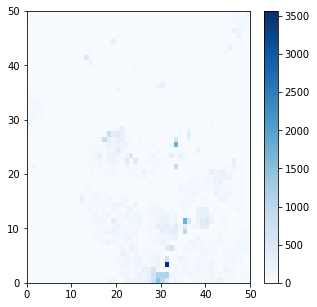

In [274]:
plt.figure(figsize=(k/10, k/10))

frequencies = np.zeros((k, k))
for position, values in som.win_map(X_train).items():
    frequencies[position[0], position[1]] = len(values)
plt.pcolor(frequencies, cmap='Blues')
plt.colorbar()
plt.show()

In [0]:
qe = np.linalg.norm(som.quantization(X_train) - X_train, axis=1)



#is_outlier =qe > error_treshold

In [0]:
err_hold = np.percentile(qe,80)
tp=0
fp=0
tn=0
fn=0

In [0]:
qe1 = np.linalg.norm(som.quantization(X_val) - X_val, axis=1)

In [0]:
qe2 = np.linalg.norm(som.quantization(X_test) - X_test, axis=1)

In [279]:
for i in range(0,len(qe1)):
  
  j=qe1[i]
  if (j<err_hold):
    tp=tp+1
  else:
    
    fn=fn+1
    
    
print (tp)
print (fn)

8753
4998


In [280]:
for i in range(0,len(qe2)):
  
  j=qe2[i]
  if (j<err_hold):
    fp=fp+1
  else:
    
    tn=tn+1
    
print (tn)
print (fp)

11734
21060
